# 종속변수 만들기, oneHot encoding, 뒤에서부터 NA count

### oneHot encoding

In [59]:
import pandas as pd
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: None},
                   'D': {0:None, 1:None, 2:None }})

In [60]:
df

,A,B,C,D
0,a,1,2.0,None
1,b,3,4.0,None
2,c,5,NaN,None


In [15]:
df.dtypes

A     object
B      int64
C    float64
D     object
dtype: object

In [16]:
df_A = pd.get_dummies(df['A']); df_A

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1


In [17]:
"""
숫자도 되네
"""
df_B = pd.get_dummies(df['B']); df_B

,1,3,5
0,1,0,0
1,0,1,0
2,0,0,1


### Get column index have NaN value in each row

In [20]:
df.isnull().sum(axis=1)

0    1
1    1
2    2
dtype: int64

1행:1개 / 2행:1개 / 3행:2개 <br>
의 Nan이 있다는 것을 알 수 있다...
- 근데 문제는, 뒤에서 부터 counting을 해야한다!!! 정의 해야할 거 같은데...
- **마지막 null이 아닌 column 번호를 구하면 되네!!**

In [49]:
cols = df.notnull().idxmax(axis=1); cols

0    A
1    A
2    A
dtype: object

In [50]:
df['a'] = df.lookup(df.index, cols) + '/' + cols
df

,A,B,C,D,a
0,a,1,2.0,None,a/A
1,b,3,4.0,None,b/A
2,c,5,NaN,None,c/A


In [56]:
import numpy as np
import pandas as pd
nan = np.nan
df2 = pd.DataFrame({'A': [0, 9, 2, 9, 1, 7, 0], 'B': [4.0, 0.0, 7.0, 7.0, nan, nan, nan]},
                  index=range(0,13,2))
df2

,A,B
0,0,4.0
2,9,0.0
4,2,7.0
6,9,7.0
8,1,NaN
10,7,NaN
12,0,NaN


In [158]:
import pandas as pd
df = pd.DataFrame({'A': {0: None, 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: None, 2: 5},
                   'C': {0: 2, 1: 4, 2: None},
                   'D': {0:None, 1:None, 2:None }})

In [159]:
idx = df['B'].last_valid_index()
idx

2

In [160]:
df

,A,B,C,D
0,None,1.0,2.0,None
1,b,NaN,4.0,None
2,c,5.0,NaN,None


In [161]:
df.shape[0]

3

In [162]:
df[1:2]

,A,B,C,D
1,b,NaN,4.0,None


In [163]:
ttt = []
ttt.append('test1')
ttt.append('test2')
ttt.append('test3')
pd.concat([df,pd.DataFrame(ttt)], axis=1)

,A,B,C,D,0
0,None,1.0,2.0,None,test1
1,b,NaN,4.0,None,test2
2,c,5.0,NaN,None,test3


In [173]:
[list(df)[-1]]*3

['D', 'D', 'D']

In [166]:
pd.DataFrame({'last_date':[list(df)[-1]]})

,last_date
0,D


In [174]:
"""근데 오래 걸릴수도..."""
def find_last_nan(df):
    cnt_row = df.shape[0]
    last_value_index_list = []
    for i in range(cnt_row):
        print(df[i:i+1].T)
        last_value_index = df[i:i+1].T.last_valid_index()
        print("** 마지막 notNull:", last_value_index ," **")
        print("=====")
        # column으로 추가
        last_value_index_list.append(last_value_index)
    
    # concat to df
    df_lvi = pd.DataFrame({'last_value_index':last_value_index_list})
    df_last_column = pd.DataFrame({'last_date':[list(df)[-1]]*cnt_row})
    
    a = pd.concat([df,df_lvi],axis=1)
    result = pd.concat([a,df_last_column],axis=1)
    return result

In [175]:
df3 = find_last_nan(df)

      0
A  None
B     1
C     2
D  None
** 마지막 notNull: C  **
=====
      1
A     b
B   NaN
C     4
D  None
** 마지막 notNull: C  **
=====
      2
A     c
B     5
C   NaN
D  None
** 마지막 notNull: B  **
=====


In [176]:
df3

,A,B,C,D,last_value_index,last_date
0,None,1.0,2.0,None,C,D
1,b,NaN,4.0,None,C,D
2,c,5.0,NaN,None,B,D


사용자 정의로 완성은함.. 깔끔한 코드는 아니지만<br>
나중에 date형태가 들어올 거기 때문에 day의 차이 구하는 column도 추가로 있어야지 추후...

# 시계열적 흐름 plot

### multiline plot

In [2]:
import matplotlib.pyplot as plt

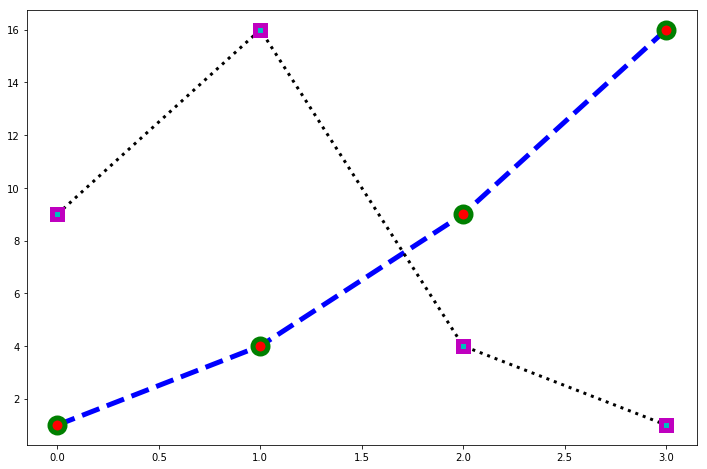

In [3]:
plt.rc('figure', figsize=(12, 8)) # rc 설정하겠다는 거다. resource configuration default:6,4

plt.plot([1, 4, 9, 16],
         c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
# plt.hold(True)   # <- 1,5 버전에서는 이 코드가 필요하다.
plt.plot([9, 16, 4, 1],
         c="k", lw=3, ls=":", marker="s", ms=10, mec="m", mew=5, mfc="c")
# plt.hold(False)  # <- 1,5 버전에서는 이 코드가 필요하다.
plt.show()

In [15]:
import pandas as pd
df = pd.DataFrame({'A': {0: 1, 1: 2, 2: 0},
                   'B': {0: 5, 1: 7, 2: 12},
                   'C': {0: 3, 1: 4, 2: 7},
                   'D': {0:17, 1:15, 2:20 }})
df

,A,B,C,D
0,1,5,3,17
1,2,7,4,15
2,0,12,7,20


In [16]:
df[i:i+1]

,A,B,C,D
2,0,12,7,20


In [21]:
df[i:i+1]

,A,B,C,D
2,0,12,7,20


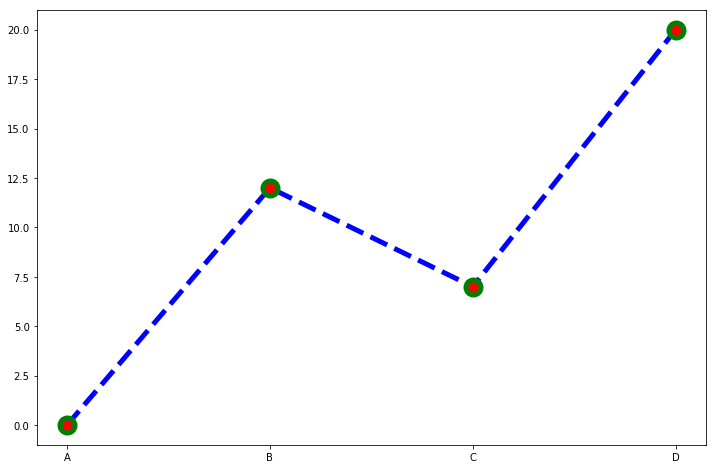

In [23]:
plt.plot(df[i:i+1].T,c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.show()

In [24]:
for i in range(df.shape[0]):
    print(df[i:i+1])
    plt.plot(df[i:i+1].T,c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")

   A  B  C   D
0  1  5  3  17
   A  B  C   D
1  2  7  4  15
   A   B  C   D
2  0  12  7  20


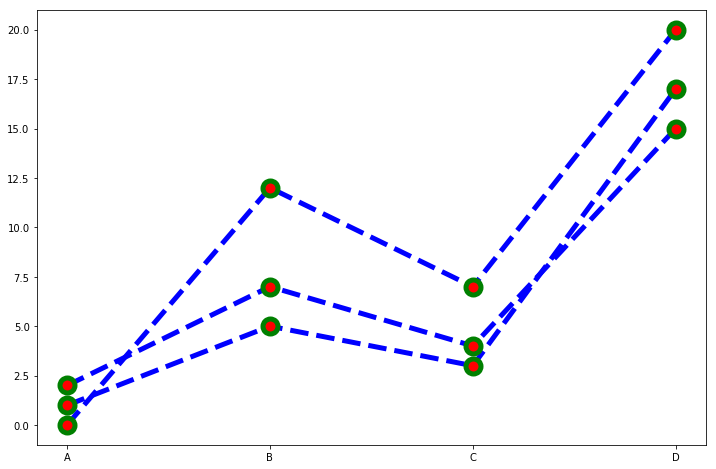

In [25]:
plt.show()

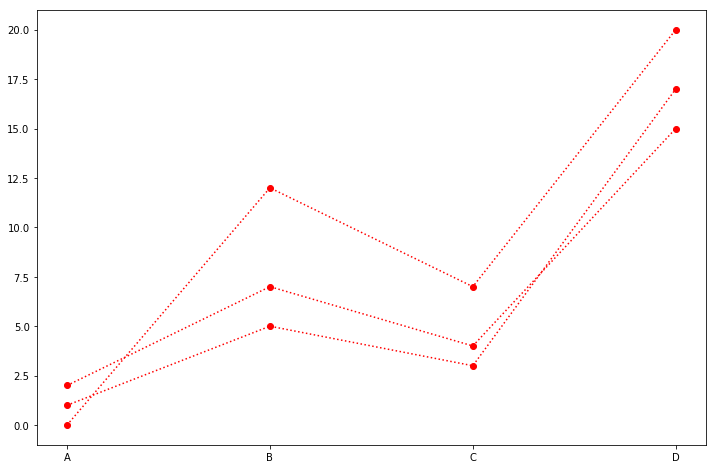

In [28]:
for i in range(df.shape[0]):
    plt.plot(df[i:i+1].T,'ro:')
plt.show()

옵션은 좀 더 봐야겠다!! <br>
모든 row를 다 볼 수 는 없을 듯, 군집을 하던지... 하면 좋겠다! average?! 

# 상관성 표, Plot

In [1]:
import pandas as pd
df = pd.DataFrame({'X_A': {0: 1, 1: 2, 2: 0},
                   'X_B': {0: 5, 1: 7, 2: 12},
                   'X_C': {0: 3, 1: 43, 2: 2},
                   'X_D': {0: 3, 1: 5, 2: 43},
                   'X_E': {0: 21, 1: 213, 2: 4},
                   'X_F': {0: 54, 1: 4, 2: 76},
                   'X_G': {0: 43, 1: 41, 2: 17},
                   'y': {0:10, 1:152, 2:33 }})
df

,X_A,X_B,X_C,X_D,X_E,X_F,X_G,y
0,1,5,3,3,21,54,43,10
1,2,7,43,5,213,4,41,152
2,0,12,2,43,4,76,17,33


### 표

In [2]:
pearson = df.corr(method='pearson')

In [3]:
pearson

,X_A,X_B,X_C,X_D,X_E,X_F,X_G,y
X_A,1.000000,-0.693375,0.876517,-0.842989,0.900316,-0.975709,0.829396,0.780668
X_B,-0.693375,1.000000,-0.260890,0.972128,-0.310635,0.518675,-0.977641,-0.090974
X_C,0.876517,-0.260890,1.000000,-0.479949,0.998653,-0.960680,0.458056,0.985100
X_D,-0.842989,0.972128,-0.479949,1.000000,-0.524828,0.704666,-0.999693,-0.321916
X_E,0.900316,-0.310635,0.998653,-0.524828,1.000000,-0.973794,0.503569,0.974847
X_F,-0.975709,0.518675,-0.960680,0.704666,-0.973794,1.000000,-0.686863,-0.898612
X_G,0.829396,-0.977641,0.458056,-0.999693,0.503569,-0.686863,1.000000,0.298350
y,0.780668,-0.090974,0.985100,-0.321916,0.974847,-0.898612,0.298350,1.000000


In [4]:
corr_with_target = pearson.iloc[-1][:-1]
corr_with_target

X_A    0.780668
X_B   -0.090974
X_C    0.985100
X_D   -0.321916
X_E    0.974847
X_F   -0.898612
X_G    0.298350
Name: y, dtype: float64

In [5]:
"""독립변수가 종속변수에 얼마나 영향을 미치는지"""
corr_with_target[abs(corr_with_target).argsort()[::-1]][:20].round(3)

X_C    0.985
X_E    0.975
X_F   -0.899
X_A    0.781
X_D   -0.322
X_G    0.298
X_B   -0.091
Name: y, dtype: float64

In [6]:
"""독립변수 간의 다중공선성 확인"""
attrs = pearson.iloc[:-1,:-1]
threshold = 0.7
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns = ['attribute pair','correlation'])

unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs
    

,attribute pair,correlation
4,"(X_D, X_G)",-0.999693
9,"(X_C, X_E)",0.998653
7,"(X_B, X_G)",-0.977641
0,"(X_A, X_F)",-0.975709
10,"(X_E, X_F)",-0.973794
6,"(X_B, X_D)",0.972128
11,"(X_C, X_F)",-0.960680
2,"(X_A, X_E)",0.900316
5,"(X_A, X_C)",0.876517
3,"(X_A, X_D)",-0.842989


### Plot

In [ ]:
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
sns.pairplot(df)

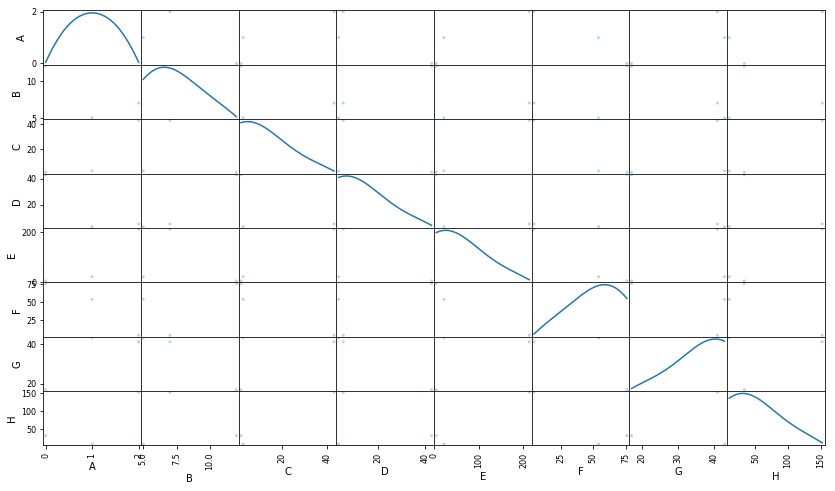

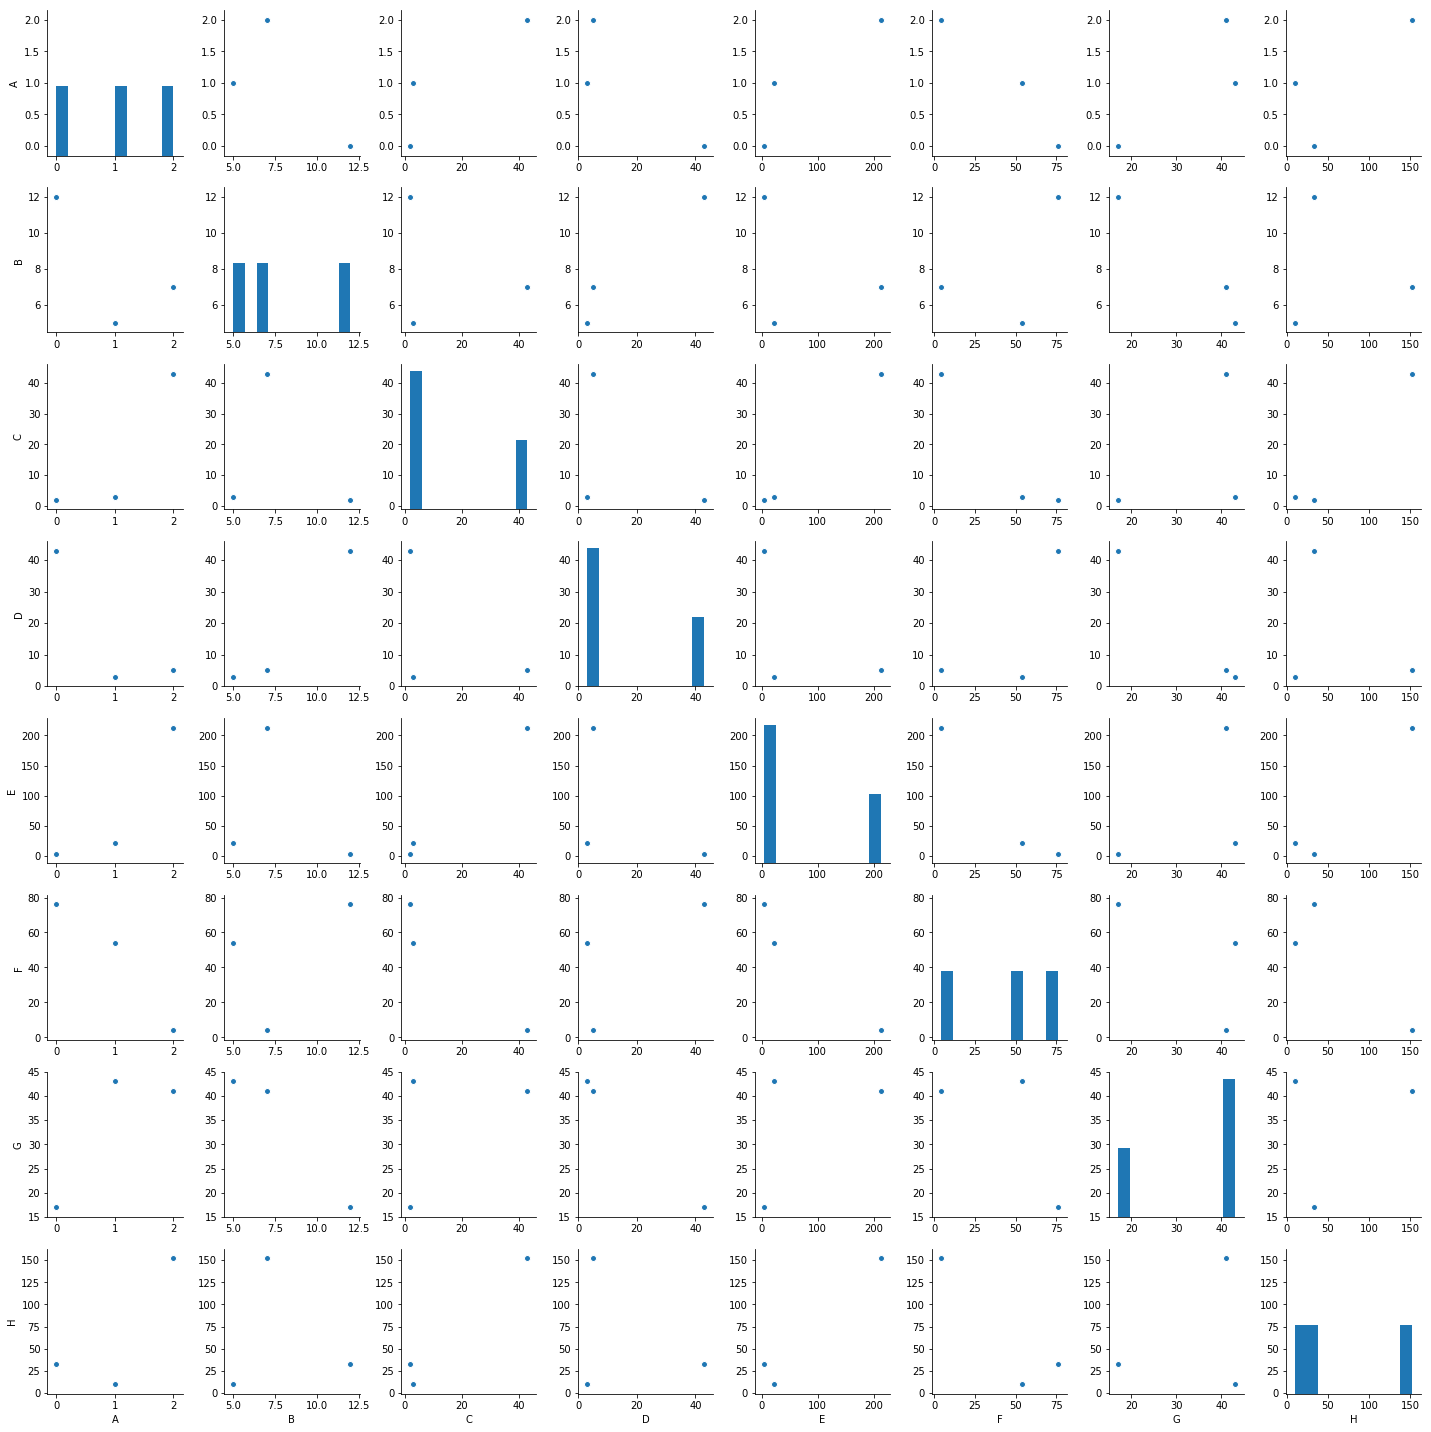

In [43]:
plt.show()

이 plot 몇개 column sample로 볼 때 써야겠다.

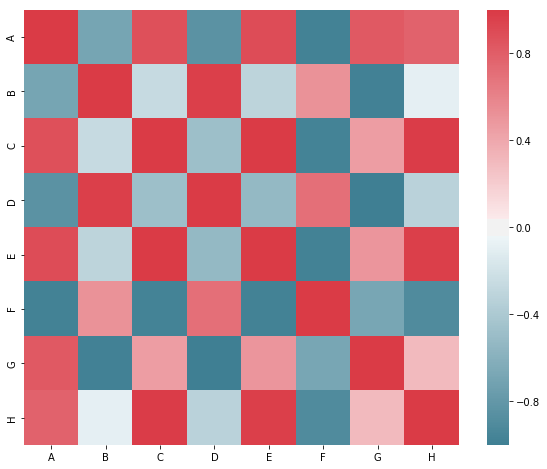

In [57]:
import seaborn as sns
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

# Merge

In [81]:
import pandas as pd
df_a = pd.DataFrame({'aA': {0: 1, 1: 2, 2: 0},
                   'aB': {0: 5, 1: 7, 2: 12},
                   'aC': {0: 3, 1: 4, 2: 7},
                   'aD': {0:17, 1:15, 2:20 }})
df_b = pd.DataFrame({'bA': {0: 1, 1: 0, 2: 2},
                   'bB': {0: "zoo", 1: "dff", 2: "tdsa"},
                   'bC': {0: 5, 1: 12, 2: 7},
                   'bD': {0:"f11", 1:"fd3", 2:"fte" }})


In [82]:
df_a

,aA,aB,aC,aD
0,1,5,3,17
1,2,7,4,15
2,0,12,7,20


In [83]:
df_b

,bA,bB,bC,bD
0,1,zoo,5,f11
1,0,dff,12,fd3
2,2,tdsa,7,fte


- inner join

In [84]:
new_df = pd.merge(df_a, df_b,  how='inner', left_on=['aA','aB'], right_on = ['bA','bC'])
new_df

,aA,aB,aC,aD,bA,bB,bC,bD
0,1,5,3,17,1,zoo,5,f11
1,2,7,4,15,2,tdsa,7,fte
2,0,12,7,20,0,dff,12,fd3


- left join

In [94]:
df_a = pd.DataFrame({'aA': {0: 1, 1: 2, 2: 0, 3:7},
                   'aB': {0: 5, 1: 7, 2: 12, 3:7},
                   'aC': {0: 3, 1: 4, 2: 7, 3:7},
                   'aD': {0:17, 1:15, 2:20, 3:7}})
df_b = pd.DataFrame({'bA': {0: 1, 1: 0, 2: 2},
                   'bB': {0: "zoo", 1: "dff", 2: "tdsa"},
                   'bC': {0: 5, 1: 12, 2: 7},
                   'bD': {0:"f11", 1:"fd3", 2:"fte" }})


In [95]:
df_a

,aA,aB,aC,aD
0,1,5,3,17
1,2,7,4,15
2,0,12,7,20
3,7,7,7,7


In [96]:
df_b

,bA,bB,bC,bD
0,1,zoo,5,f11
1,0,dff,12,fd3
2,2,tdsa,7,fte


In [97]:
new_df = pd.merge(df_a, df_b,  how='left', left_on=['aA','aB'], right_on = ['bA','bC'])
new_df

,aA,aB,aC,aD,bA,bB,bC,bD
0,1,5,3,17,1.0,zoo,5.0,f11
1,2,7,4,15,2.0,tdsa,7.0,fte
2,0,12,7,20,0.0,dff,12.0,fd3
3,7,7,7,7,NaN,NaN,NaN,NaN


# Random Forest
#### 의미있는 feature 볼 수 있으니!! 

In [98]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Set random seed
np.random.seed(0)

In [101]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [104]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [121]:
# Check species, y value summary...
df["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [122]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [123]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [127]:
train.shape

(118, 6)

In [128]:
test.shape

(32, 6)

In [129]:
# Create a list of the feature column's names, 독립변수이름
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

train['species'] contains the actual species names. Before we can use it, <br>
**we need to convert each species name into a digit.** So, in this case there <br>
are three species, which have been coded as 0, 1, or 2.

In [132]:
y = pd.factorize(train['species'])[0]
# View target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [133]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [136]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
# get predict value
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [137]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ]])

In [139]:
clf.predict_proba(test[features]) # just probabilities about prediction to each factors

array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.5,  0.5],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.9,  0.1],
       [ 0. ,  0.2,  0.8],
       [ 0. ,  0.3,  0.7],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.8,  0.2],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ]])

In [140]:
# Create actual english names for the plants for each predicted plant class
preds = iris.target_names[clf.predict(test[features])]

In [145]:
preds

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype='<U10')

In [146]:
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [147]:
# View the PREDICTED species for the first five observations
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'],
      dtype='<U10')

In [148]:
# View the ACTUAL species for the first five observations
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [149]:
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [150]:
"""View a list of the features and their importance scores"""
list(zip(train[features], clf.feature_importances_))

[('sepal length (cm)', 0.11185992930506346),
 ('sepal width (cm)', 0.016341813006098178),
 ('petal length (cm)', 0.36439533040889194),
 ('petal width (cm)', 0.5074029272799464)]

we can know petal width is most importance independent variable in this case

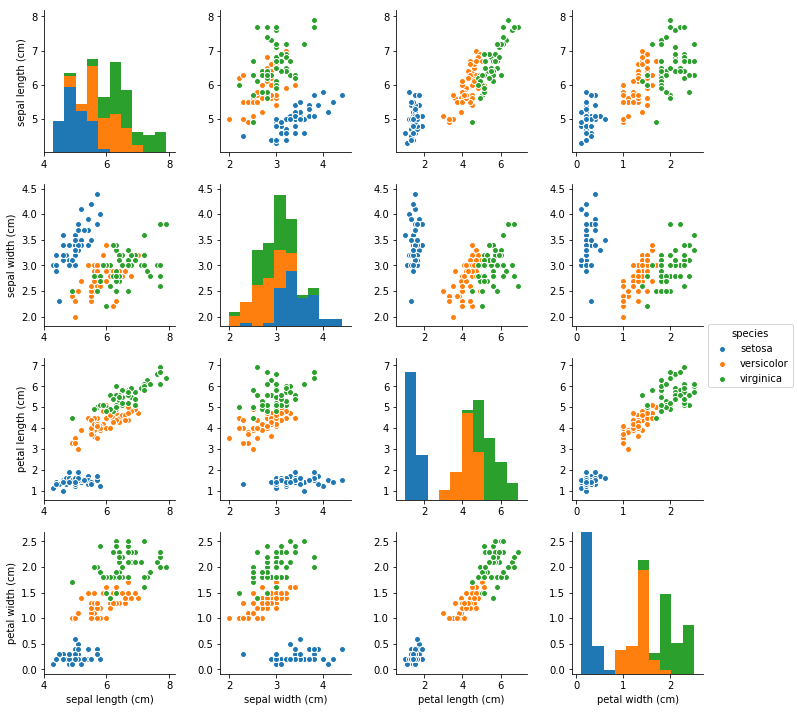

In [158]:
# 그냥
sns.pairplot(df.loc[:, df.columns != 'is_train'], hue="species")
plt.show()

# PCA(주성분),, 설명...

In [194]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [195]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [196]:
pd.DataFrame(pca.components_)

,0,1,2,3
0,0.36159,-0.082269,0.856572,0.358844
1,0.65654,0.729712,-0.175767,-0.074706


In [190]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)
pca = PCA(n_components=2)
pca.fit(df)
pd.DataFrame(pca.components_)

,0,1,2,3
0,0.36159,-0.082269,0.856572,0.358844
1,0.65654,0.729712,-0.175767,-0.074706


왜 row를 줄이지?! 

- 다른 방법

In [197]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [203]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values #array 네..
y = df.iloc[:,4].values

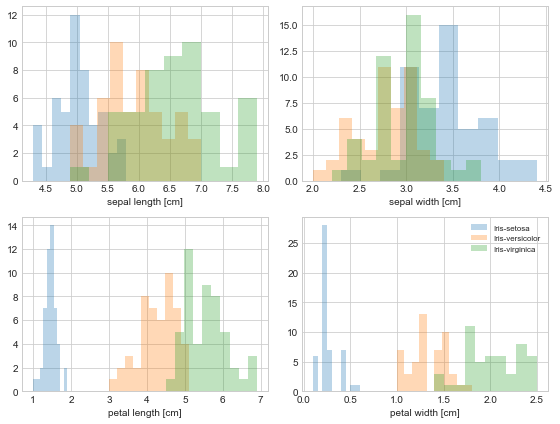

In [204]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [208]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X) # 정규분포 표준화네!! 

    (Done)A.종속변수 만들기, oneHot encoding, 뒤에서부터 NA count
        - 종속변수는 user_id, out 이렇게 2컬럼 distinct로 존재해야지!! 
    B.	어떤 유형의 유저들이 있더라 ex) 빨리이탈, 띄엄띄엄 접속, 매일접속, 주말에만 접속, 등등…

    (Doing)C.시계열적 흐름 plot 유저당 1줄이지.하루 접속 비중을 plot 안 이쁠듯...
        - 어떤 유형의 유저들이 있더라 ex) 빨리이탈, 띄엄띄엄 접속, 매일접속, 주말에만 접속, 등등…
        - 이거 군집해 볼 수 있으면 좋은데... 
    (Done)D.상관성 표, plot
    
    (Done)E.Merge 하기
    (Done)F.RandomForest 영향력 큰 독립변수 확인
    G.예측은, RF나 DecisionTree 등 좀 조건식을 만들 수 있는??! 걸로 하자.
    H.다양한 Plot..약함.
    
    **중요**
    I.Train test 어떻게 나눌까?!, 유저를 7:3으로 나눌거다. 비슷한 유형의 유저 구분해서,,
        -  10일이상 접속, 3주간의 데이터를 받는다… 
        -  최근 3일이상 접속 안했으면 이탈로보고, 종속변수를 생성, 
           이탈인지 무이탈인지… 근데 여기서 초기이탈, 최근이탈, 무이탈 3개로 나눌 수 있지 않을까?! => 아닐듯..
        -  3일 이상 이탈한 사람이 없으면..?! => 2일로 줄이고, 그래도 없으면,,,, 안되는데,,, 
        => 중간중간 이탈이 많은 사람들… 이들을 이탈 위험군으로?! 해서 이탈로 정의하자.. 이거는 말이 안되는데… 
        -  아무튼 유저id 별로 이렇게 종속변수를 만들고, day기준 100만으로 join을 할거같다!! 
           그렇게 하면, 유저의 하루당, 데이터들이 있을 건데,,, 
        => 1일째 유저기록, 2일째 기록... 마지막 접속 기록 으로 이탈을 예측한다?! 
           몇 일 정도 이탈로 예측하면 이탈할 수 있다고 봐야한다?! 
           아니면 1줄로 pivot해서 예측해야 한다..?! 
          => 전자가 맞는듯.. 몇일 정도 이탈 이라고 예상되면 관리 들어가야한다 식으로...


    J.Column cluster(주성분?!), Row cluster
    K.설문한 내용 잠깐 보여 주며, ux측면에서도,, 쌓이는 데이터와 그 유저 인터뷰로 콜라보 분석 할 수 있지 않을까?!
    L.Sampling을 제대로 해봤으면 좋았을 것 같기도 하다!!... 너무 대용량 데이터로 달라고 해서...
